In [469]:
import numpy as np
from math import log, sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

Log = np.vectorize(log)
Abs = np.vectorize(abs)

def l(x):
    return m.coef_[0] * x + m.coef_[1] * log(x) + m.intercept_
def q(x):
    return m.coef_[0]*x + m.coef_[1] * x**2 + m.intercept_

Q = np.vectorize(q)
L = np.vectorize(l)

In [470]:
x = np.random.random(100)*100

x_2 = x**2
x_3 = x**3
x_4 = x**4
x_5 = x**5
x_6 = x**6
x_7 = x**7
lg_x = Log(x)

#Log generated Data
y_1 = Log(x) + ((Log(x))*(0.25))*np.random.randn(100)

#Quadratic generated Data
y_2 = (2 * x + x**2 + 4) + (2 * x + x**2 + 4)**0.85 * np.random.randn(100)

#Setting Up Data Frame
col = ['x^1', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7', 'log_generated', 'quad_generated']
df = pd.DataFrame(np.array([x, x_2, x_3, x_4, x_5, x_6, x_7, y_1, y_2]).T, columns=col)
df['x^0'] = 1
df['log'] = df['x^1'].apply(Log)
df = df[['x^0', 'log'] + col]

In [471]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:])

Fitting log generated data with quadratic. Score: 0.330228235336


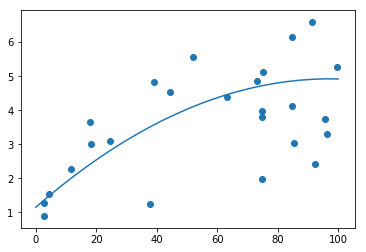

In [472]:
m = LinearRegression()
m.fit(X_train[['x^1', 'x^2']], y_train.log_generated)

x_s = np.linspace(0, 100, 25)
plt.plot(x_s, Q(x_s))

plt.scatter(X_test['x^1'], y_test.log_generated)


s = m.score(X_test[['x^1', 'x^2']], y_test.log_generated)

print('Fitting log generated data with quadratic. Score: %s' % s)

Fitting log generated data with log. Score: 0.353146080991


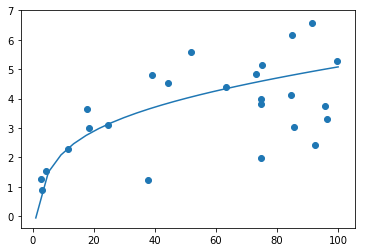

In [473]:
m = LinearRegression()
m.fit(X_train[['x^1', 'log']], y_train.log_generated)

x_s = np.linspace(1, 100, 25)
plt.plot(x_s, L(x_s))

plt.scatter(X_test['x^1'], y_test.log_generated)

s = m.score(X_test[['x^1', 'log']], y_test.log_generated)

print('Fitting log generated data with log. Score: %s' % s)

Fitting quadratic generated data with quadratic. Score: 0.860622711686


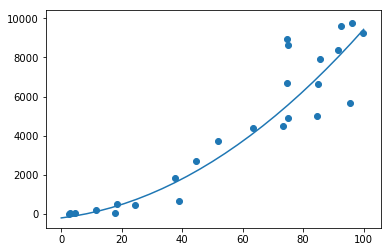

In [474]:
m = LinearRegression()
m.fit(X_train[['x^1', 'x^2']], y_train.quad_generated)

x_s = np.linspace(0, 100, 25)
plt.plot(x_s, Q(x_s))

plt.scatter(X_test['x^1'], y_test.quad_generated)


s = m.score(X_test[['x^1', 'x^2']], y_test.quad_generated)

print('Fitting quadratic generated data with quadratic. Score: %s' % s)

Fitting quadratic generated data with log. Score: 0.862883911386


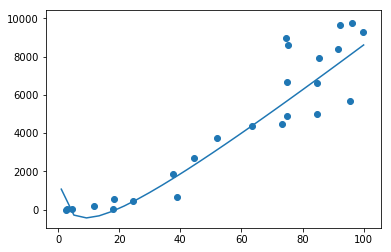

In [475]:
m = LinearRegression()
m.fit(X_train[['x^1', 'log']], y_train.quad_generated)

x_s = np.linspace(1, 100, 25)
plt.plot(x_s, L(x_s))

plt.scatter(X_test['x^1'], y_test.quad_generated)

s = m.score(X_test[['x^1','log']], y_test.quad_generated)

print('Fitting quadratic generated data with log. Score: %s' % s)

In [478]:
results = []
for target in [['log_generated'], ['quad_generated']]:  
    for i in range(1, 9):
        m = LinearRegression()
        cols = ['x^' + str(j) for j in range(i)]
        X_tr, X_te, y_tr, y_te = X_train[cols], X_test[cols], y_train[target], y_test[target]
        m.fit(X_tr, y_tr)
        results.append([target[0], i-1, m.score(X_tr, y_tr), m.score(X_te, y_te)])

res_df = pd.DataFrame(results, columns=['data source', 'degree of poly fit', 'train score', 'test score'])
res_df

,data source,degree of poly fit,train score,test score
0,log_generated,0,0.000000,-0.009617
1,log_generated,1,0.600432,0.147819
2,log_generated,2,0.644965,0.330228
3,log_generated,3,0.717501,0.253935
4,log_generated,4,0.719434,0.257953
5,log_generated,5,0.724030,0.269170
6,log_generated,6,0.724030,0.269121
7,log_generated,7,0.724157,0.272360
8,quad_generated,0,0.000000,-0.256985
9,quad_generated,1,0.814441,0.820593


Polynomial fit for log generated data:


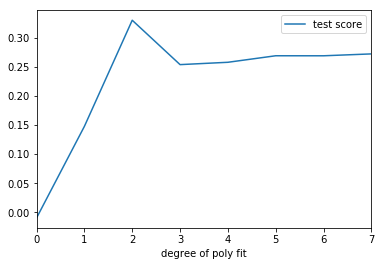

In [480]:
lg = res_df[res_df['data source'] == 'log_generated'][['degree of poly fit', 'test score']]
lg.set_index('degree of poly fit', inplace=True)
lg.plot();
print('Polynomial fit for log generated data:')

Polynomial fit for quadratic generated data:


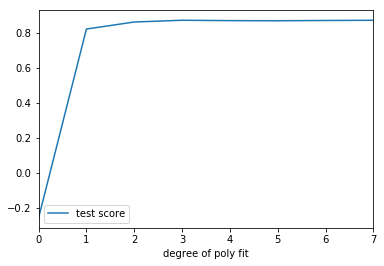

In [481]:
lg = res_df[res_df['data source'] == 'quad_generated'][['degree of poly fit', 'test score']]
lg.set_index('degree of poly fit', inplace=True)
lg.plot();
print('Polynomial fit for quadratic generated data:')

With quartic fit for log generated data: 

number of points 5 	 score on test: -13901.6347434
number of points 10 	 score on test: -2.46754481439
number of points 15 	 score on test: 0.195253202221
number of points 20 	 score on test: 0.230962715121
number of points 25 	 score on test: 0.35636609736
number of points 30 	 score on test: 0.42041250244
number of points 35 	 score on test: 0.323896728246
number of points 40 	 score on test: 0.224660217493
number of points 45 	 score on test: 0.17556340079
number of points 50 	 score on test: 0.177109235691
number of points 55 	 score on test: 0.219376633378
number of points 60 	 score on test: 0.216355327443
number of points 65 	 score on test: 0.247972601212
number of points 70 	 score on test: 0.264413108438


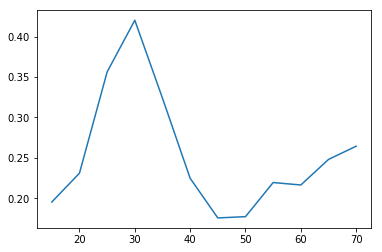

In [487]:
col = ['x^0', 'x^1', 'x^2', 'x^3', 'x^4']
scores = []
print('With quartic fit for log generated data: \n')
for n in range(5, 71, 5):
    m = LinearRegression()
    i = list(range(n))
    X_tr, y_tr = X_train.iloc[i], y_train.iloc[i]
    m.fit(X_tr[col], y_tr.log_generated)
    sc = m.score(X_te[col], y_test.log_generated)
    print ('number of points %s \t score on test: %s' % (n, sc))
    scores.append(sc)
    
plt.plot(list(range(5, 75, 5))[2:], scores[2:]);